In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(4)

In [23]:
def load_data(string,path='../Datasets for Mid Sem Presentation/'):
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    return X,y
        
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(1+truth))




def abs_error(pred,truth):
    return np.mean(np.abs(pred-truth))




In [24]:
test_x,test_y = load_data('test_data')
train_x,train_y = load_data("train_data_2")
v_x,v_y = load_data("val_data_2")

In [25]:
test_x[0].sum()

511585.4

In [26]:
test_y[0].sum()

511585.4

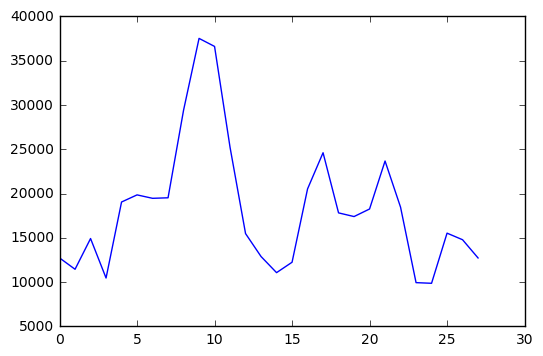

In [50]:
plt.close('all')

plt.plot(np.arange(0,28),test_x[0].reshape(-1,28)[0])
plt.show()

In [51]:
len(train_x)

86

In [27]:
from sklearn.neighbors import KNeighborsRegressor
k_range = len(train_x)
errors = []
for i in range(2,k_range):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(train_x, train_y) 
    errors.append(relative_cost(v_y,neigh.predict(v_x)))

    
    
    

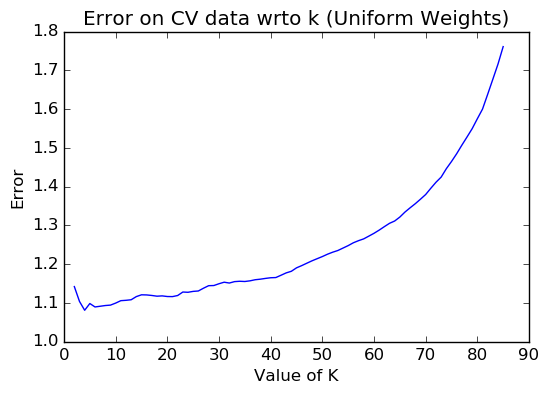

In [11]:
plt.close('all')
plt.plot(np.arange(2,k_range),errors)
plt.title('Error on CV data wrto k (Uniform Weights)')#,color='white')
plt.xlabel('Value of K')#,color='white') 
plt.ylabel('Error')#,color='white')
#plt.yticks(color='white')
#plt.xticks(color='white')
plt.rcParams.update({'font.size': 12})
plt.show()

In [12]:
min_k = 2+ errors.index(min(errors))

In [13]:
min(errors)

1.0806106

In [14]:
min_k

4

In [15]:
model  = KNeighborsRegressor(n_neighbors=min_k)
model.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [16]:
pred_train = model.predict(train_x)
pred_v = model.predict(v_x)
pred_test = model.predict(test_x)

In [17]:
train_cost = relative_cost(train_y,pred_train)
v_cost = relative_cost(v_y,pred_v)
test_cost = relative_cost(test_y,pred_test)

In [18]:
train_cost,test_cost,v_cost

(0.75233227, 0.9196365, 1.0806106)

In [21]:
train_cost,test_cost,v_cost

(302.1425, 402.49945, 430.32773)

In [20]:
train_cost = abs_error(train_y,pred_train)
v_cost = abs_error(v_y,pred_v)
test_cost = abs_error(test_y,pred_test)

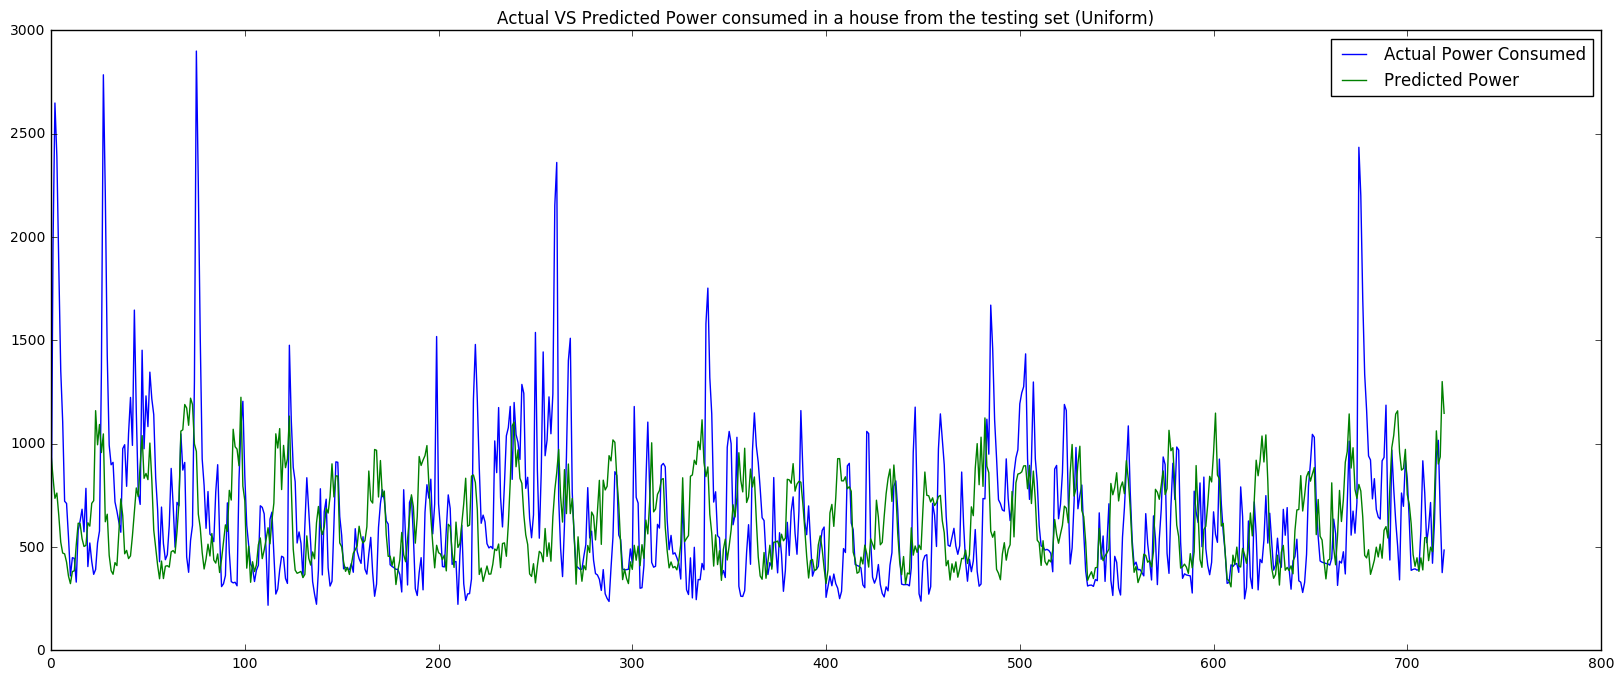

In [14]:
house = 16
plt.close('all')
fig = plt.figure(figsize=(20,8))
plt.plot(np.arange(0,720),test_y[house],label='Actual Power Consumed')
plt.plot(np.arange(0,720),test_pred[house],label='Predicted Power')
plt.title("Actual VS Predicted Power consumed in a house from the testing set (Uniform)")
plt.legend()

plt.show()

In [15]:
inds = model.kneighbors(np.expand_dims(test_x[house],0),min_k)[1]
inds  = inds[:,:1]

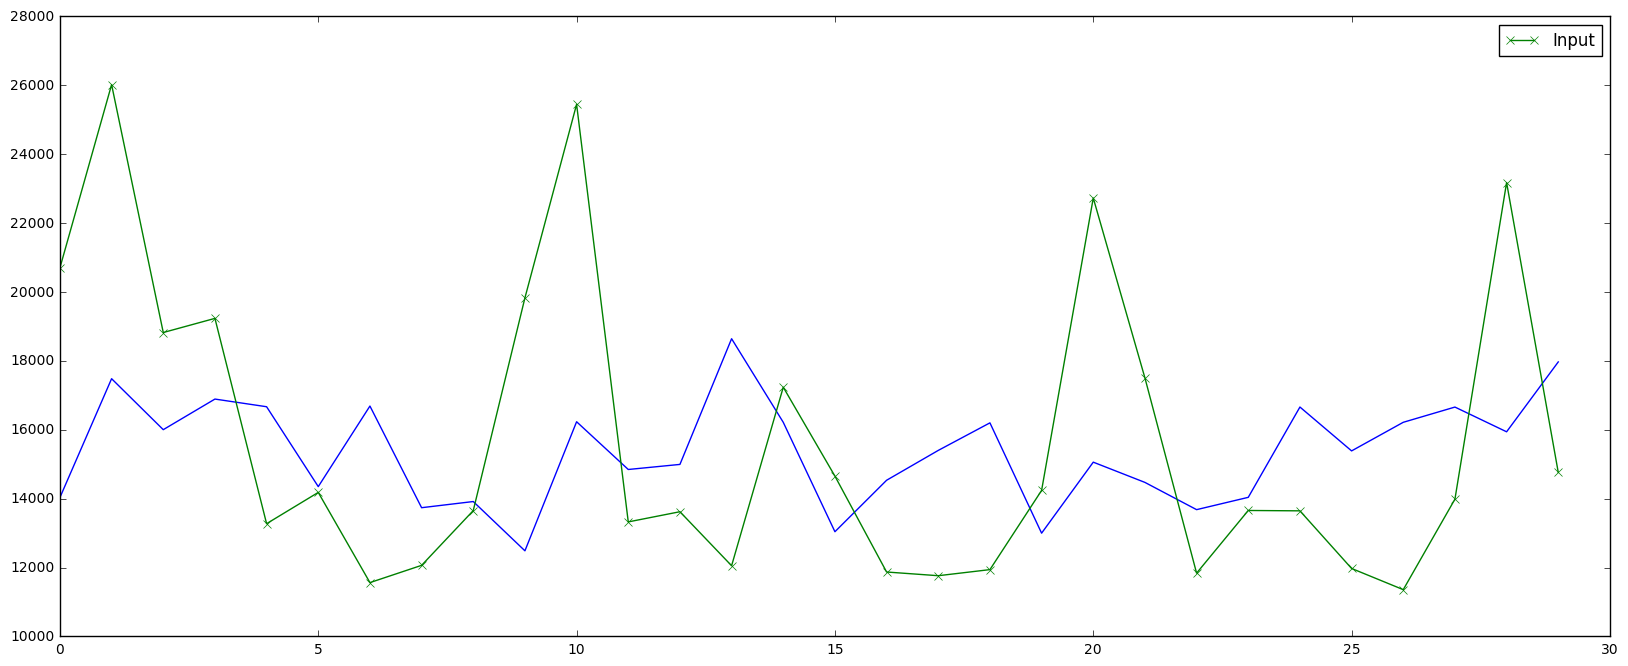

In [16]:
plt.close('all')

plt.figure(figsize=(20,8))
neighs = train_x[inds]
for i in neighs[0]:
    plt.plot(np.arange(0,30),i)
    
plt.plot(np.arange(0,30),test_x[house],'gx-',label="Input")

plt.legend()
plt.show()




In [26]:
errors = abs(model.predict(test_x) - test_y)/test_y

In [27]:
errors

array([[7.3630899e-01, 4.1189414e-01, 4.7418451e-01, ..., 4.1792640e-01,
        4.9253654e-01, 3.6220589e-01],
       [4.2464456e-01, 4.1653335e-01, 1.2527369e+00, ..., 1.9419889e-01,
        3.3733492e+00, 2.8215694e+00],
       [5.0437611e-01, 7.4726325e-01, 2.8643355e-01, ..., 2.1771901e+00,
        5.1442075e+00, 2.5379702e-01],
       ...,
       [9.4015497e-01, 8.6831641e-01, 1.0213250e+00, ..., 9.6168149e-01,
        1.4447626e+00, 8.6714125e-01],
       [7.6301515e-02, 9.4346859e-02, 1.2810102e-01, ..., 1.0289379e-01,
        2.0472834e-01, 3.9524096e-03],
       [3.2999834e-01, 2.6162487e-01, 2.9351816e-01, ..., 4.1924405e-01,
        1.4344929e-01, 2.1975951e-01]], dtype=float32)

In [19]:
errors = abs(test_y - model.predict(test_x))/test_y
min_val = np.min(np.mean(errors,axis=1))
max_val = np.max(np.mean(errors,axis=1))
lst = np.mean(errors,axis=1)

In [20]:
req_y = test_y[np.where(lst==min_val,True,False)]
req_x = test_x[np.where(lst==min_val,True,False)]
pred_x = model.predict(test_x)[np.where(lst==min_val,True,False)]

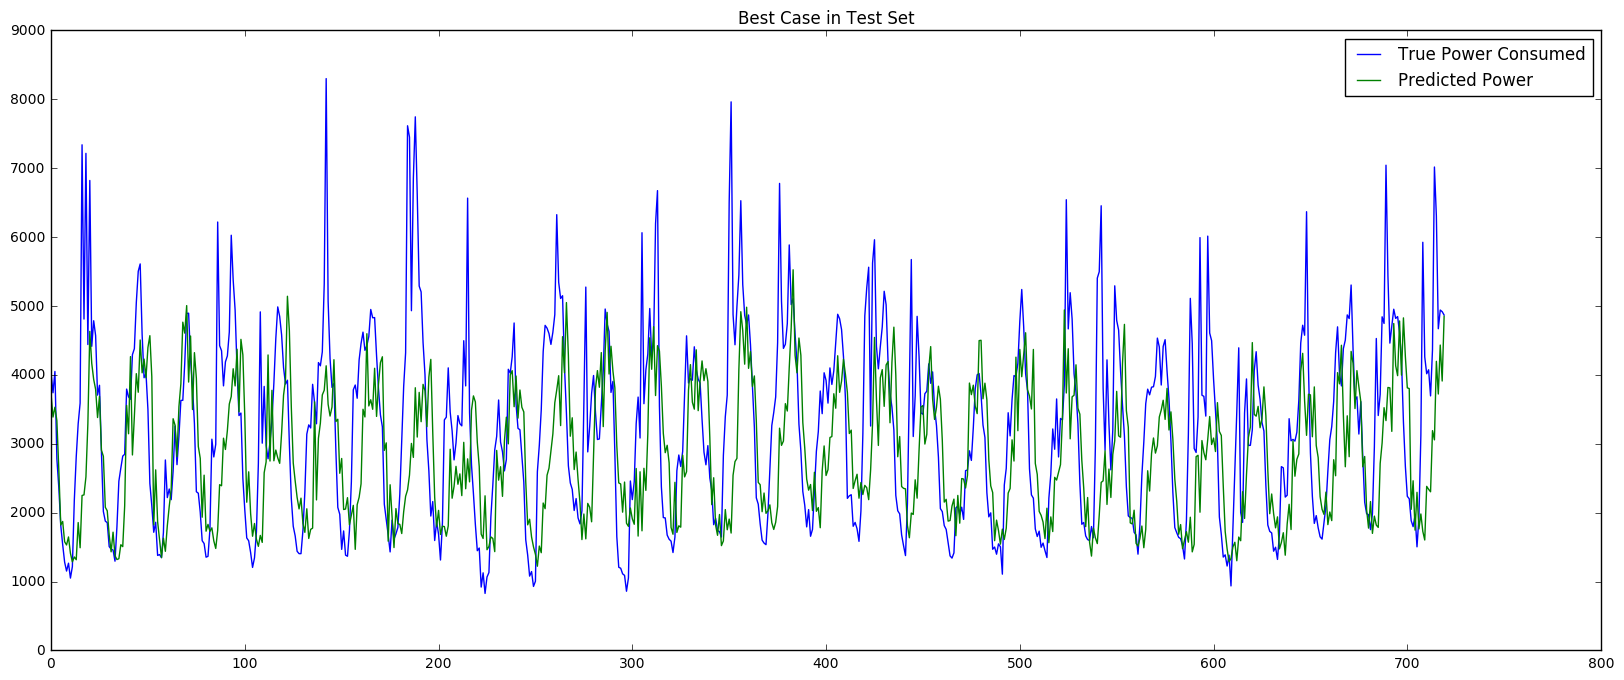

0.30722585

In [21]:
plt.close('all')
plt.figure(figsize=(20,8))

plt.plot(np.arange(0,720),req_y[0],label='True Power Consumed')
plt.plot(np.arange(0,720),pred_x[0],label='Predicted Power')
plt.title('Best Case in Test Set')
plt.legend()
plt.show()
min_val

In [22]:
req_y = test_y[np.where(lst==max_val,True,False)]
req_x = test_x[np.where(lst==max_val,True,False)]
pred_x = model.predict(test_x)[np.where(lst==max_val,True,False)]

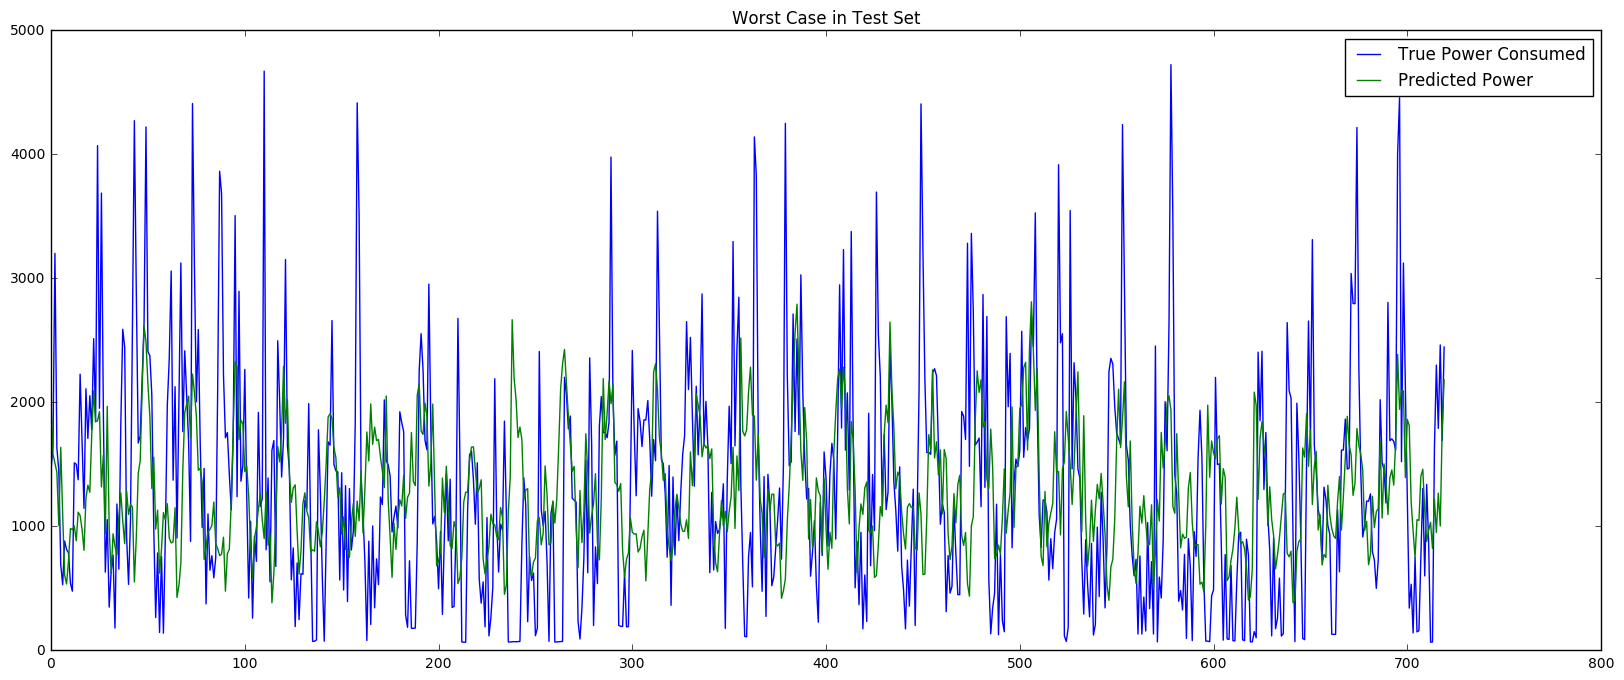

1.8694429

In [23]:
plt.close('all')
plt.figure(figsize=(20,8))

plt.plot(np.arange(0,720),req_y[0],label='True Power Consumed')
plt.plot(np.arange(0,720),pred_x[0],label='Predicted Power')
plt.title('Worst Case in Test Set')
plt.legend()
plt.show()
max_val